# nested imade classifier

## Looking at plots from training runs

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
style.use('fivethirtyeight')

#sns.set_context('talk')
sns.set_color_codes()

### Run 1

In [2]:
training = pd.read_csv('./model_run_data/history_tl_run1.csv')
training = training.rename(columns={'Unnamed: 0':'Epoch'})

In [3]:
training['Epoch'] = training['Epoch']+1

In [5]:
training.head()

,Epoch,acc,loss,val_acc,val_loss
0,1,0.504205,1.669639,0.565665,1.603235
1,2,0.628777,1.098132,0.698312,1.078396
2,3,0.657887,1.014414,0.661916,1.164880
3,4,0.676000,0.953108,0.711905,1.021741
4,5,0.684687,0.926682,0.694585,1.225341


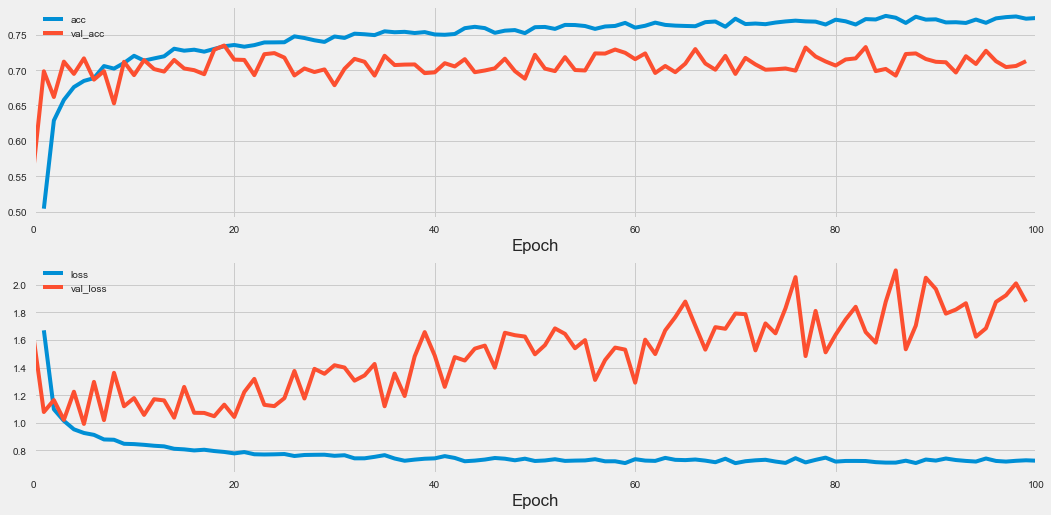

In [6]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))

training.plot(x='Epoch', y='acc', ax=ax1)
training.plot(y='val_acc', ax=ax1)

training.plot(x='Epoch', y='loss', ax=ax2)
training.plot(y='val_loss', ax=ax2)

Looks like c. Epoch 20 is best place to try and FT from.

### Run 2

In [7]:
training2 = pd.read_csv('./model_run_data/history_tl_run2.csv')
training2 = training2.rename(columns={'Unnamed: 0':'Epoch'})
training2['Epoch'] = training2['Epoch']+1
training2.head()

,Epoch,acc,loss,val_acc,val_loss
0,1,0.455903,2.180962,0.695404,1.038493
1,2,0.602308,1.176325,0.640132,1.243888
2,3,0.642328,1.065629,0.686392,1.069958
3,4,0.673818,0.984538,0.748273,0.908474
4,5,0.677707,0.955504,0.714629,1.071398


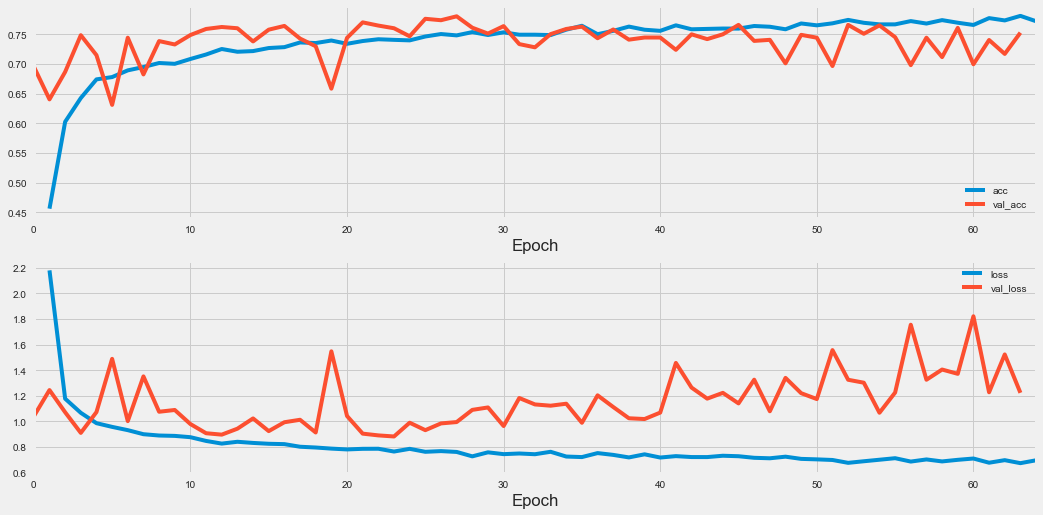

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))

training2.plot(x='Epoch', y='acc', ax=ax1)
training2.plot(y='val_acc', ax=ax1)

training2.plot(x='Epoch', y='loss', ax=ax2)
training2.plot(y='val_loss', ax=ax2)

Looks to be around 20. Run again (32 epochs) saving checkpoints every 2 epochs


### Run 3

In [9]:
training3 = pd.read_csv('./model_run_data/history_tl_run3.csv')
training3 = training3.rename(columns={'Unnamed: 0':'Epoch'})
training3['Epoch'] = training3['Epoch']+1
training3.head()

,Epoch,acc,loss,val_acc,val_loss
0,1,0.461297,2.015115,0.640733,1.178186
1,2,0.606323,1.166829,0.624512,1.339733
2,3,0.648099,1.041972,0.697807,1.194861
3,4,0.671058,0.980630,0.691199,1.119488
4,5,0.681721,0.953736,0.732652,0.915784


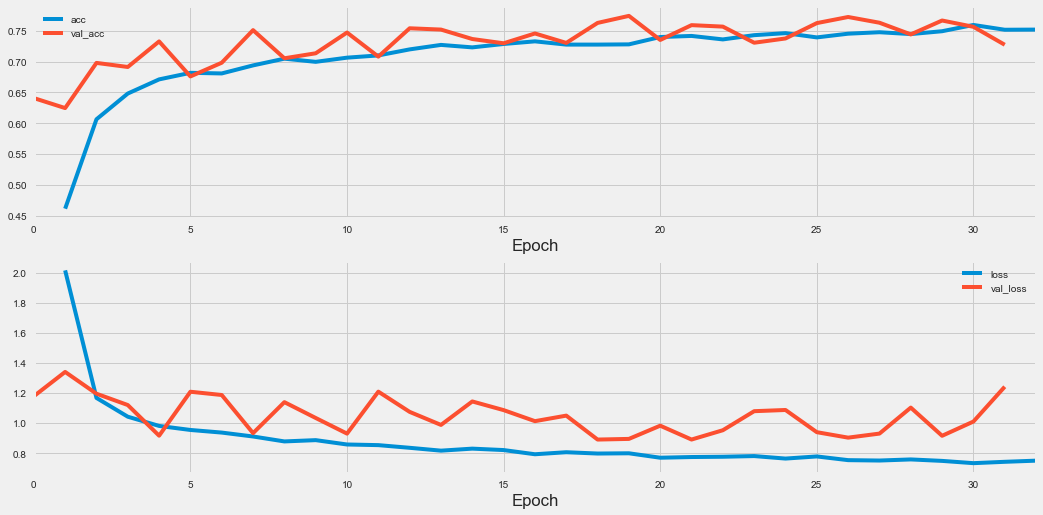

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))

training3.plot(x='Epoch', y='acc', ax=ax1)
training3.plot(y='val_acc', ax=ax1)

training3.plot(x='Epoch', y='loss', ax=ax2)
training3.plot(y='val_loss', ax=ax2)

ERROR - only saved tl every 5 epochs (!). Run again ....

### Run 4

In [11]:
training4 = pd.read_csv('./model_run_data/history_tl_run4.csv')
training4 = training4.rename(columns={'Unnamed: 0':'Epoch'})
training4['Epoch'] = training4['Epoch']+1
training4.head()

,Epoch,acc,loss,val_acc,val_loss
0,1,0.462426,2.051751,0.466506,1.803280
1,2,0.607327,1.164263,0.725743,0.934247
2,3,0.639819,1.055614,0.715831,1.035717
3,4,0.667419,0.986833,0.721838,1.076178
4,5,0.679839,0.951644,0.706819,1.181702


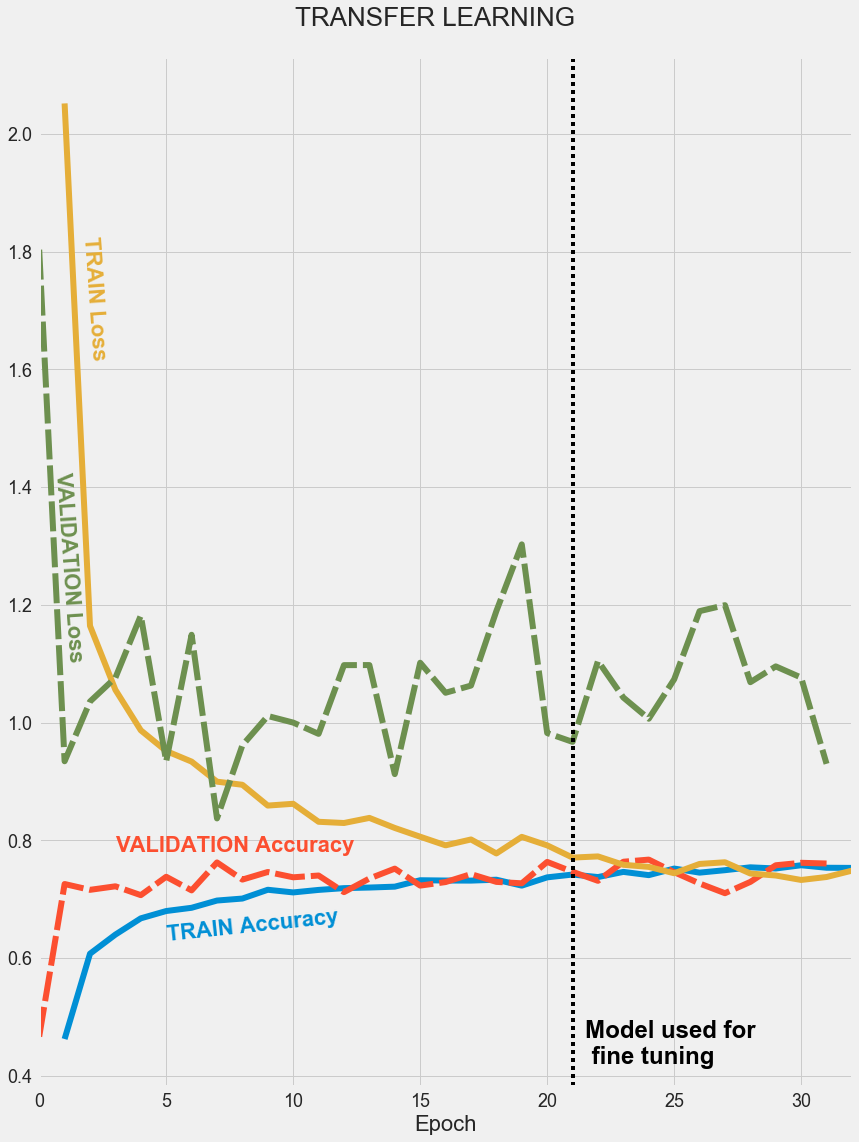

In [12]:
fig, ax1 = plt.subplots(1,1, figsize=(12,16))
linewidth = 6

training4.plot(x='Epoch', y='acc', ax=ax1,linewidth=linewidth)
training4.plot(y='val_acc', ax=ax1,linewidth=linewidth, linestyle=(0,(5,1)))

training4.plot(x='Epoch', y='loss', ax=ax1,linewidth=linewidth)
training4.plot(y='val_loss', ax=ax1,linewidth=linewidth, linestyle=(0,(5,1)))

ax1.axvline(21, color='black', linestyle=(0,(1,1)))



fig.suptitle('TRANSFER LEARNING', fontsize=26)
fig.tight_layout(rect=[0,0, 1, 0.95])

blue = ax1.get_children()[0].get_color()
red = ax1.get_children()[1].get_color()
yellow = ax1.get_children()[2].get_color()
green = ax1.get_children()[3].get_color()

ax1.text(5, 0.66, 'TRAIN Accuracy', weight='bold', color=blue, fontsize=22, rotation=6)
ax1.text(3, 0.78, 'VALIDATION Accuracy', weight='bold', color=red, fontsize=22)
ax1.text(1.6, 1.8, 'TRAIN Loss', weight='bold', color=yellow, fontsize=22, rotation=-86)
ax1.text(0.5, 1.4, 'VALIDATION Loss', weight='bold', color=green, fontsize=22, rotation = -86)

ax1.text(21.5, 0.42, 'Model used for \n fine tuning', weight='bold', color='black',
        fontsize=24)

ax1.legend_.remove()

ax1.tick_params(labelsize=18)
ax1.xaxis.label.set_size(22)



#fig.savefig('./working_data/run4_tl.png')

### Run 4 - Fine tune
`model_output_2018-03-18_21`

In [13]:
training4_ft = pd.read_csv('./model_run_data/history_ft_run4.csv')
training4_ft = training4_ft.rename(columns={'Unnamed: 0':'Epoch'})
training4_ft['Epoch'] = training4_ft['Epoch']+1
training4_ft.head()

,Epoch,acc,loss,val_acc,val_loss
0,1,0.780078,0.652164,0.762391,0.773511
1,2,0.808054,0.571897,0.765095,0.747366
2,3,0.821603,0.531818,0.766296,0.747092
3,4,0.827249,0.509987,0.760889,0.751820
4,5,0.841927,0.465719,0.774106,0.729428


In [14]:
sns.color_palette()

[(0.0, 0.5607843137254902, 0.8352941176470589),
 (0.9882352941176471, 0.30980392156862746, 0.18823529411764706),
 (0.8980392156862745, 0.6823529411764706, 0.2196078431372549),
 (0.42745098039215684, 0.5647058823529412, 0.30980392156862746),
 (0.5450980392156862, 0.5450980392156862, 0.5450980392156862),
 (0.5058823529411764, 0.058823529411764705, 0.48627450980392156)]

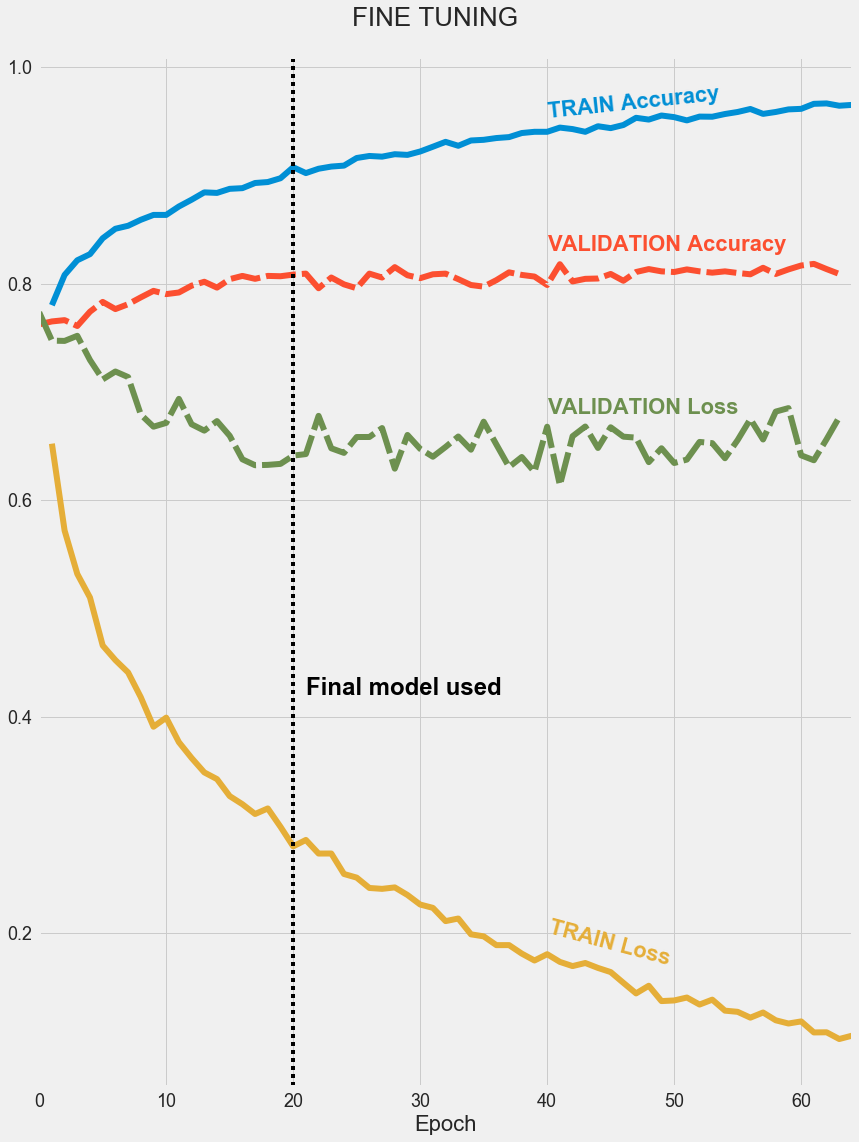

In [16]:
import matplotlib.style as style
style.use('fivethirtyeight')

#sns.set_context('talk')
sns.set_color_codes()

fig, ax1 = plt.subplots(1,1, figsize=(12,16))
linewidth = 6

training4_ft.plot(x='Epoch', y='acc', ax=ax1, label='TRAIN Acc',
                  linewidth=linewidth)
training4_ft.plot(y='val_acc', ax=ax1, label='VALIDATION Acc',
                  linestyle=(0,(5,1)), linewidth=linewidth)

training4_ft.plot(x='Epoch', y='loss', ax=ax1, label='TRAIN Loss',
                 linewidth=linewidth)
training4_ft.plot(y='val_loss', ax=ax1, label='VALIDATION Loss',
                  linestyle=(0,(5,1)), linewidth=linewidth)


ax1.axvline(20, color='black', linestyle=(0,(1,1)))



fig.suptitle('FINE TUNING', fontsize=26)
fig.tight_layout(rect=[0,0, 1, 0.95])

blue = ax1.get_children()[0].get_color()
red = ax1.get_children()[1].get_color()
yellow = ax1.get_children()[2].get_color()
green = ax1.get_children()[3].get_color()

ax1.text(40, 0.97, 'TRAIN Accuracy', weight='bold', color=blue, fontsize=22, rotation=6)
ax1.text(40, 0.83, 'VALIDATION Accuracy', weight='bold', color=red, fontsize=22)
ax1.text(40, 0.2, 'TRAIN Loss', weight='bold', color=yellow, fontsize=22, rotation=-15)
ax1.text(40, 0.68, 'VALIDATION Loss', weight='bold', color=green, fontsize=22)

ax1.text(21, 0.42, 'Final model used', weight='bold', color='black',
        fontsize=24)

ax1.legend_.remove()

ax1.tick_params(labelsize=18)
ax1.xaxis.label.set_size(22)




#fig.savefig('./working_data/run4_ft.png')

Run 20 looks to be where val_loss is at a min - before overfitting...

`Incv3_nested_run_4_FT_ft_20-0.63.hdf5`

looks to be model to benchmark on